In [4]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [6]:
# Load data
file_2022 = pd.read_excel('Region_4A_DA_MORONG_RIZAL_1-1-22_12-00_AM_1_Year_1732084536_v2.xlsx')
file_2023 = pd.read_excel('Region_4A_DA_MORONG_RIZAL_1-1-23_12-00_AM_1_Year_1732084578_v2.xlsx')
file_2024 = pd.read_excel('Region_4A_DA_MORONG_RIZAL_1-1-24_12-00_AM_1_Year_1732084607_v2.xlsx')


In [7]:
# Prepare the data
cols_needed = ['Date & Time', 'Rain - mm', 'Rain Rate - mm/h']
df_2022 = file_2022[cols_needed]
df_2023 = file_2023[cols_needed]
df_2024 = file_2024[cols_needed]
combined_df = pd.concat([df_2022, df_2023, df_2024], ignore_index=True)


In [8]:
# Convert Date column to datetime
train_dates = pd.to_datetime(combined_df['Date & Time'])


In [9]:
# Prepare data for training (using both rainfall and rain rate)
cols = ['Rain - mm', 'Rain Rate - mm/h']
training_df = combined_df[cols].astype(float)


In [18]:
# Standardize the data
scalar = StandardScaler()
training_df_scaled = scalar.fit_transform(training_df)

# Prepare lists for trainX (input data) and trainY (target data)
trainX = [] 
trainY = []

n_past = 20  # Look at the past 20 values
n_fut = 100  # Predict the next 100 values

# Create sequences of data
for i in range(n_past, len(training_df_scaled) - n_fut + 1):
    trainX.append(training_df_scaled[i - n_past:i, 0:training_df_scaled.shape[1]])
    trainY.append(training_df_scaled[i + n_fut - 1:i + n_fut, 0])

# Convert lists to numpy arrays
trainX, trainY = np.array(trainX), np.array(trainY)

In [20]:
# Define and summarize the LSTM model
model = Sequential()
model.add(LSTM(32, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.3))

model.add(Dense(trainY.shape[1]))
model.compile(optimizer='adam', loss='mse')

model.summary()


C:\Users\nikki\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 20, 32)         │         4,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 20, 32)         │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,153 (82.63 KB)

 Trainable params: 21,153 (82.63 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Train the model
history = model.fit(trainX, trainY, epochs=30, batch_size=5, validation_split=0.2, verbose=1)

Epoch 1/30
16180/16180 ━━━━━━━━━━━━━━━━━━━━ 155s 9ms/step - loss: 0.1927 - val_loss: 2.1525
Epoch 2/30
16180/16180 ━━━━━━━━━━━━━━━━━━━━ 149s 9ms/step - loss: 0.1805 - val_loss: 2.2020
Epoch 3/30
16180/16180 ━━━━━━━━━━━━━━━━━━━━ 149s 9ms/step - loss: 0.1669 - val_loss: 2.1227
Epoch 4/30
16180/16180 ━━━━━━━━━━━━━━━━━━━━ 152s 9ms/step - loss: 0.1633 - val_loss: 2.2062
Epoch 5/30
16180/16180 ━━━━━━━━━━━━━━━━━━━━ 154s 10ms/step - loss: 0.1606 - val_loss: 2.3588
Epoch 6/30
16180/16180 ━━━━━━━━━━━━━━━━━━━━ 155s 10ms/step - loss: 0.1662 - val_loss: 2.3753
Epoch 7/30
16180/16180 ━━━━━━━━━━━━━━━━━━━━ 156s 10ms/step - loss: 0.1560 - val_loss: 2.3404
Epoch 8/30
16180/16180 ━━━━━━━━━━━━━━━━━━━━ 153s 9ms/step - loss: 0.1554 - val_loss: 2.2540
Epoch 9/30
16180/16180 ━━━━━━━━━━━━━━━━━━━━ 152s 9ms/step - loss: 0.1466 - val_loss: 2.2841
Epoch 10/30
16180/16180 ━━━━━━━━━━━━━━━━━━━━ 151s 9ms/step - loss: 0.1526 - val_loss: 2.2337
Epoch 11/30
16180/16180 ━━━━━━━━━━━━━━━━━━━━ 152s 9ms/step - loss: 0.1452 - 

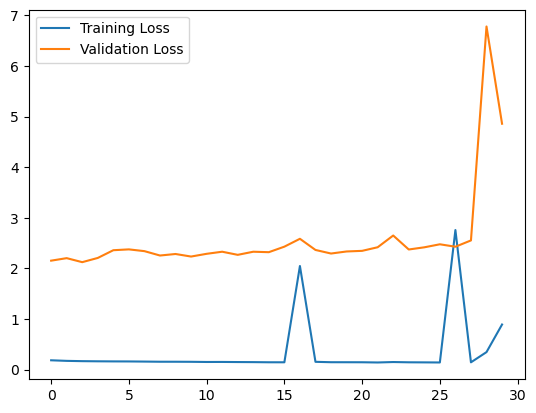

In [23]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step
RMSE: 0.0307, MAE: 0.0307, R²: 0.0000


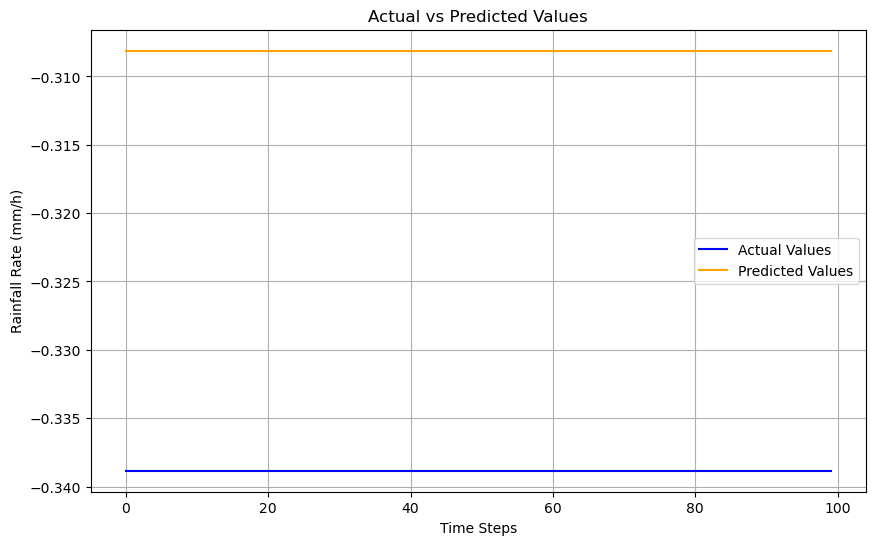

In [24]:
# Evaluate the model on the last 100 data points (test data)
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")
    
    # Plot actual vs. predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.flatten(), label='Actual Values', color='blue')
    plt.plot(predictions.flatten(), label='Predicted Values', color='orange')
    plt.title('Actual vs Predicted Values')
    plt.xlabel('Time Steps')
    plt.ylabel('Rainfall Rate (mm/h)')
    plt.legend()
    plt.grid()
    plt.show()
    
    return predictions

# Call the evaluation function
test_predictions = evaluate_model(model, trainX[-100:], trainY[-100:])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

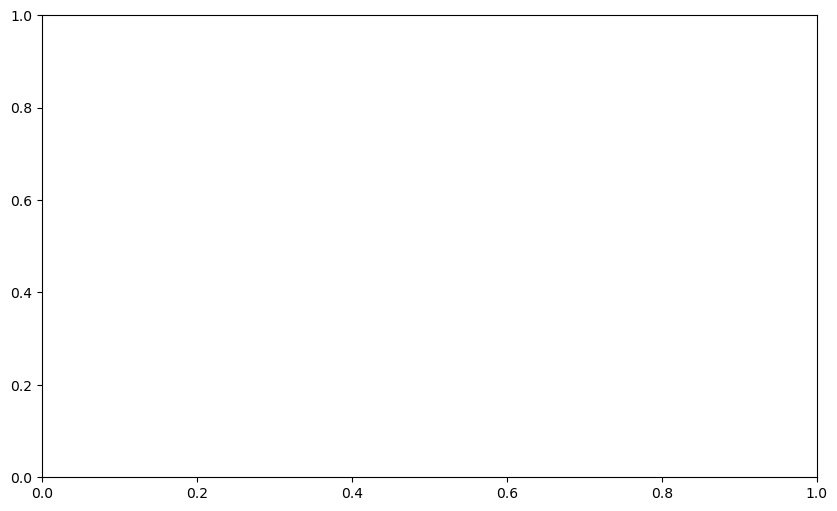

In [25]:
# Predict future rainfall
def predict_future(model, recent_data, n_past, n_fut):
    recent_sequence = recent_data[-n_past:].reshape(1, n_past, recent_data.shape[1])
    predictions = model.predict(recent_sequence)
    return predictions.flatten()

future_predictions = predict_future(model, training_df_scaled, n_past, n_fut)

# Plot future predictions
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(training_df_scaled), len(training_df_scaled) + n_fut), future_predictions, label='Future Predictions', color='green')
plt.title('Future Rainfall Predictions')
plt.xlabel('Time Steps')
plt.ylabel('Rainfall Rate (mm/h)')
plt.legend()
plt.grid()
plt.show()